In [6]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
t=pd.read_csv('edu.csv')[['Indicator','Country','Time','Value']]

In [8]:
mapdic = {
    "Percentage of graduates from Science, Technology , Engineering and Mathematics programmes in tertiary education who are female (%)": "STEM",
    "Percentage of graduates from other fields than Science, Technology , Engineering and Mathematics programmes in tertiary education who are female (%)": "NonSTEM",
}
t['Indicator']=t['Indicator'].map(mapdic)


In [9]:
t=t.dropna(subset=['Indicator','Value'])

In [10]:
t.query('Country=="Bangladesh"')

,Indicator,Country,Time,Value
13400,STEM,Bangladesh,2002,28.55921
13401,STEM,Bangladesh,2003,23.77152
14425,NonSTEM,Bangladesh,2002,32.95454
14426,NonSTEM,Bangladesh,2003,34.24150
14427,NonSTEM,Bangladesh,2012,42.75214


In [77]:

t2=t.query('Time>=2012').groupby(['Country','Indicator']).Value.mean().unstack().eval('STEM/NonSTEM').sort_values()

In [74]:
sigis=(pd.read_csv('Rdata.csv')[['Country','TIME','equality_index']]
 .dropna(subset=['equality_index']).query('TIME>=2012').groupby(['Country']).equality_index.mean()
).reset_index()

Text(3    0.376096
Name: ratio, dtype: float64, 3   -0.001561
Name: sigi, dtype: float64, 'Belgium')

<Figure size 288x288 with 0 Axes>

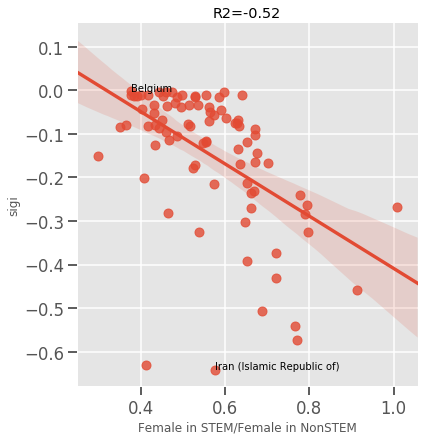

In [78]:
seaborn.set_context('talk'); plt.style.use('ggplot')
plt.figure(figsize=(4,4))
to_plot=pd.merge(t2.to_frame().reset_index(),sigis,on="Country")
to_plot.columns=['Country','ratio','sigi']
seaborn.lmplot('ratio',"sigi",to_plot,height=6)
plt.title(f'R2={round(to_plot.corr().iloc[0,1],2)}')
plt.xlabel('Female in STEM/Female in NonSTEM')
low=to_plot.sort_values('sigi').head(1)
high=to_plot.sort_values('sigi').tail(1)
plt.annotate(xy=(low.ratio,low.sigi),s=low.Country.values[0])
plt.annotate(xy=(high.ratio,high.sigi),s=high.Country.values[0])

Text(73    2.261349
Name: ratio, dtype: float64, 73   -0.001561
Name: sigi, dtype: float64, 'Belgium')

<Figure size 288x288 with 0 Axes>

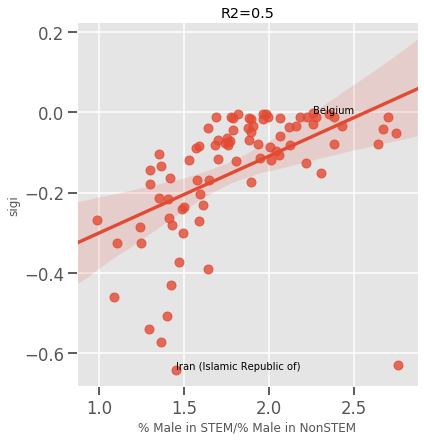

In [96]:

t2=t.query('Time>=2012').groupby(['Country','Indicator']).Value.mean().unstack().eval('(100-STEM)/(100-NonSTEM)').sort_values()
seaborn.set_context('talk'); plt.style.use('ggplot')
plt.figure(figsize=(4,4))
to_plot=pd.merge(t2.to_frame().reset_index(),sigis,on="Country")
to_plot.columns=['Country','ratio','sigi']
seaborn.lmplot('ratio',"sigi",to_plot,height=6)
plt.title(f'R2={round(to_plot.corr().iloc[0,1],2)}')
plt.xlabel('% Male in STEM/% Male in NonSTEM')
low=to_plot.sort_values('sigi').head(1)
high=to_plot.sort_values('sigi').tail(1)
plt.annotate(xy=(low.ratio,low.sigi),s=low.Country.values[0])
plt.annotate(xy=(high.ratio,high.sigi),s=high.Country.values[0])

Text(0.5, 1, 'R2=-0.51')

<Figure size 288x288 with 0 Axes>

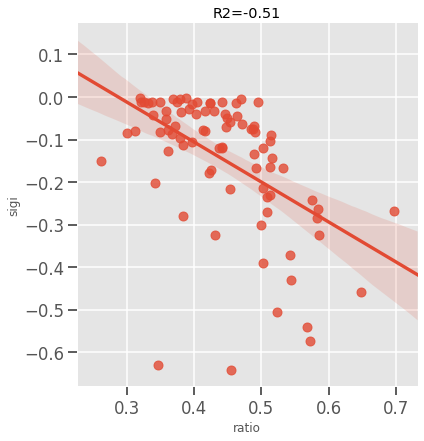

In [37]:
seaborn.set_context('talk'); plt.style.use('ggplot')
plt.figure(figsize=(4,4))
to_plot=pd.merge(t2.to_frame().applymap(pd.np.log1p).reset_index(),sigis,on="Country")
to_plot.columns=['Country','ratio','sigi']
seaborn.lmplot('ratio',"sigi",to_plot,height=6)
plt.title(f'R2={round(to_plot.corr().iloc[0,1],2)}')
# plt.xlabel('Female in STEM/Female in NonSTEM')
# low=to_plot.sort_values('sigi').head(1)
# high=to_plot.sort_values('sigi').tail(1)
# plt.annotate(xy=(low.ratio,low.sigi),s=low.Country.values[0])
# plt.annotate(xy=(high.ratio,high.sigi),s=high.Country.values[0])

In [ ]:
This is FSTEM/TSTEM over FNSTEM/TNSTEM 

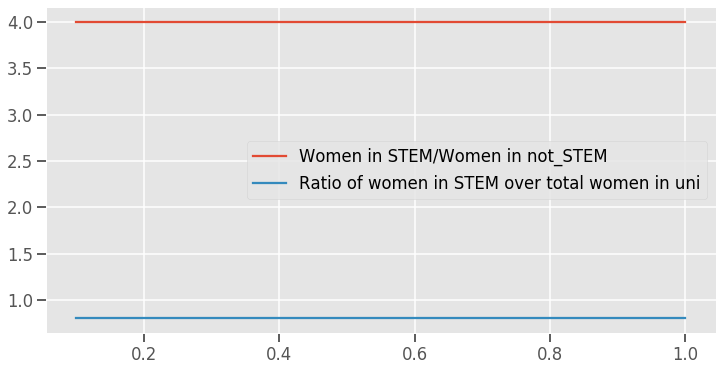

In [101]:
seaborn.set_context('talk'); plt.style.use('ggplot')
import numpy as np
def scenario(women_into_uni=0.5,women_into_stem=0.8):
    men=1000
    women=1000
    men_into_uni=0.8
    men_into_stem=0.8
   
    women_uni=women_into_uni*women
    
    total_men_stem=men*men_into_uni*men_into_stem
    total_women_stem=women*women_into_uni*women_into_stem
    
    total_men_nostem=men*men_into_uni*(1-men_into_stem)
    total_women_nostem=women*women_into_uni*(1-women_into_stem)    
    
    rel_ratio=total_women_stem/total_women_nostem
    stem_over_uni=total_women_stem/women_uni   
    

    WSTEM=women_into_stem/(1-women_into_stem)
    
    women*women_into_uni*women_into_stem/women_into_uni*women
    
    
    return rel_ratio,stem_over_uni



women_into_uni=np.arange(0.1,1.1,0.1)
scenarios=[scenario(i)[0] for i in women_into_uni]
plt.figure(figsize=(12,6))
plt.plot(women_into_uni,scenarios)
scenarios=[scenario(i)[1] for i in women_into_uni]
plt.plot(women_into_uni,scenarios)

plt.legend(['Women in STEM/Women in not_STEM','Ratio of women in STEM over total women in uni'])

In [ ]:
scenarios=[scenario(i)[0] for i in women_into_uni]
plt.figure(figsize=(12,6))
plt.plot(women_into_uni,scenarios)
scenarios=[scenario(women_into_stem=i)[1] for i in women_into_uni]
plt.plot(women_into_uni,scenarios)

plt.legend(['Ratio of men to women in STEM','Ratio of women in STEM over total women in uni'])

In [50]:
women_uni=pd.read_csv('tertiarytotal.csv')
women_uni=(women_uni.query('TIME>2012 and Indicator=="Percentage of graduates from tertiary education who are female (%)"')[['TIME','Country','Value']]
 .groupby(['Country']).Value.mean().reset_index()
 
).rename(columns={'Value':'women_uni'})

In [56]:
women_uni.sort_values("women_uni")

,Country,women_uni
0,Afghanistan,18.305570
41,Eritrea,26.317730
23,Burundi,30.137930
66,Liechtenstein,31.791690
51,Guinea,33.008700
22,Burkina Faso,33.062725
43,Ethiopia,33.520040
16,Bhutan,34.192760
73,Mauritania,35.247890
121,Uzbekistan,36.098137


Text(7    59.449205
Name: Stem_over_totalw, dtype: float64, 7   -0.001561
Name: equality_index, dtype: float64, 'Belgium')

<Figure size 864x432 with 0 Axes>

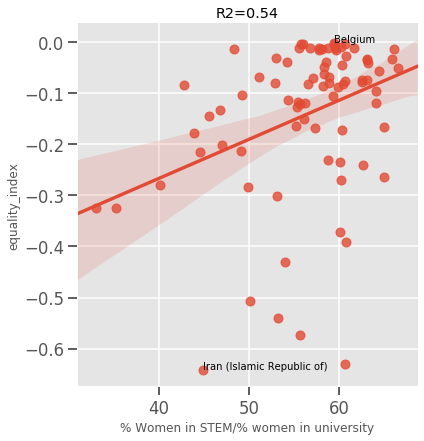

In [95]:
t2=t.query('Time>=2012').groupby(['Country','Indicator']).Value.mean().unstack().STEM.dropna().reset_index()
t2_women=pd.merge(t2,women_uni)
to_plot=pd.merge(t2_women,sigis)
to_plot=to_plot.assign(Stem_over_totalw=lambda x: x.eval('women_uni'))
####
seaborn.set_context('talk'); plt.style.use('ggplot')
plt.figure(figsize=(12,6))

seaborn.lmplot('Stem_over_totalw',"equality_index",to_plot,height=6)
plt.title(f'R2={round(to_plot.corr().iloc[0,1],2)}')
plt.xlabel('% Women in STEM/% women in university')
baddie=to_plot.sort_values('equality_index').head(1)
goodie=to_plot.sort_values('equality_index').tail(1)
plt.annotate(xy=(baddie.Stem_over_totalw,baddie.equality_index),s=baddie.Country.values[0])
plt.annotate(xy=(goodie.Stem_over_totalw,goodie.equality_index),s=goodie.Country.values[0])

In [99]:
women_uni.sort_values('women_uni')

,Country,women_uni
0,Afghanistan,18.305570
41,Eritrea,26.317730
23,Burundi,30.137930
66,Liechtenstein,31.791690
51,Guinea,33.008700
22,Burkina Faso,33.062725
43,Ethiopia,33.520040
16,Bhutan,34.192760
73,Mauritania,35.247890
121,Uzbekistan,36.098137


Text(11    59.449205
Name: Stem_over_totalw, dtype: float64, 11   -0.001561
Name: equality_index, dtype: float64, 'Belgium')

<Figure size 864x432 with 0 Axes>

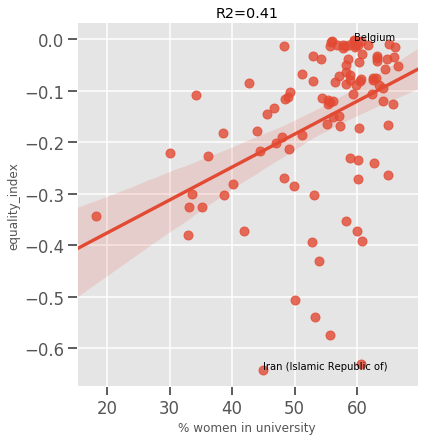

In [100]:
# t2=t.query('Time>=2012').groupby(['Country','Indicator']).Value.mean().unstack().STEM.dropna().reset_index()
t2_women=women_uni
to_plot=pd.merge(t2_women,sigis)
to_plot=to_plot.assign(Stem_over_totalw=lambda x: x.eval('women_uni'))
####
seaborn.set_context('talk'); plt.style.use('ggplot')
plt.figure(figsize=(12,6))

seaborn.lmplot('Stem_over_totalw',"equality_index",to_plot,height=6)
plt.title(f'R2={round(to_plot.corr().iloc[0,1],2)}')
plt.xlabel('% women in university')
baddie=to_plot.sort_values('equality_index').head(1)
goodie=to_plot.sort_values('equality_index').tail(1)
plt.annotate(xy=(baddie.Stem_over_totalw,baddie.equality_index),s=baddie.Country.values[0])
plt.annotate(xy=(goodie.Stem_over_totalw,goodie.equality_index),s=goodie.Country.values[0])

In [91]:
women_uni

,Country,women_uni
0,Afghanistan,18.305570
1,Albania,65.019817
2,Algeria,62.708187
3,Andorra,66.948103
4,Angola,48.040160
5,Argentina,65.110610
6,Aruba,75.953705
7,Australia,57.800155
8,Austria,55.594987
9,Azerbaijan,53.085087


Text(7    40.550795
Name: Stem_over_totalw, dtype: float64, 7   -0.001561
Name: equality_index, dtype: float64, 'Belgium')

<Figure size 864x432 with 0 Axes>

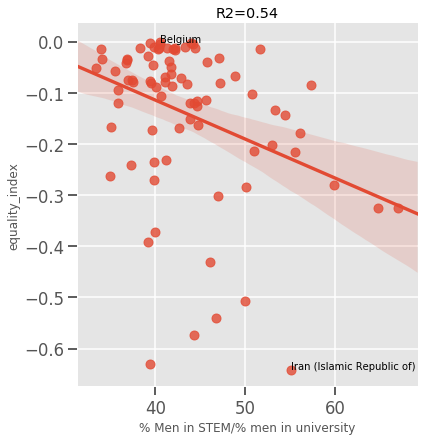

In [94]:
t2=t.query('Time>=2012').groupby(['Country','Indicator']).Value.mean().unstack().STEM.dropna().pipe(lambda x: 100-x).reset_index()
t2_women=pd.merge(t2,women_uni.assign(women_uni=lambda x: 100-x.women_uni))
to_plot=pd.merge(t2_women,sigis)
to_plot=to_plot.assign(Stem_over_totalw=lambda x: x.eval('women_uni'))
####
seaborn.set_context('talk'); plt.style.use('ggplot')
plt.figure(figsize=(12,6))

seaborn.lmplot('Stem_over_totalw',"equality_index",to_plot,height=6)
plt.title(f'R2={round(to_plot.corr().iloc[0,1],2)}')
plt.xlabel('% Men in STEM/% men in university')
baddie=to_plot.sort_values('equality_index').head(1)
goodie=to_plot.sort_values('equality_index').tail(1)
plt.annotate(xy=(baddie.Stem_over_totalw,baddie.equality_index),s=baddie.Country.values[0])
plt.annotate(xy=(goodie.Stem_over_totalw,goodie.equality_index),s=goodie.Country.values[0])

In [52]:
from keras import models
from keras import optimizers
X=np.array([1,2,3,4,5,6])
X2=np.array([1,2,3,4,5,6,7,8,9,10])
y=np.array([6,5,4,3.2,2,1])

from keras.models import Sequential
from keras.layers import Dense, Activation,BatchNormalization

model = Sequential([
    Dense(1, input_shape=(1,)),
    BatchNormalization(),
    Dense(1),
    Activation('relu'),
])
model.compile(optimizers.SGD(lr=0.2),"mean_squared_error")
model.fit(X,y,epochs=10,verbose=2)




pred=model.predict(X2)
plt.plot(X,y)
plt.plot(X2,pred)

ModuleNotFoundError: No module named 'keras'

In [ ]:
!pip install tensorflow